# **Detecção de anomalias**

No contexto de *Data Science*, uma anomalia pode ser entendida como um *outlier*, isto é, uma observação discrepante das demais, indicando um comportamento diferente do esperado ou "fora" do padrão. Algumas aplicações envolvem:

* Falhas em sistemas ou na fabricação de peças;
* Aumento ou queda repentina nas vendas
* Fraudes financeiras
* Eventos não-recorrentes (em séries temporais)

<br>

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/anomaly_detection_excel.png?raw=true" width="800px"/>

## **Isolation Forest**

Árvores binárias o quão fornecem um *score* de esforço ao separar cada ponto dos demais.

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/IsolationForest.png?raw=true" width="700px"/>



Vantagens:
* Rápido
* Boa generalização
* Computacionalemente eficiente (RAM)

Limitações:
* Dependente do parâmetro `contamination` (definido via conhecimento de negócio e/ou análise exploratória)

Implementação no Python:

```python
# Biblioteca:
from sklearn.ensemble import IsolationForest

# Modelo:
modelo_IF = IsolationForest(contamination=n, random_state=k)

# Treino
colunas_de_interesse = []
modelo_IF.fit(dados[colunas_de_interesse])

# Scores e predições
dados['score_IF'] = modelo_IF.decision_function(dados[colunas_de_interesse])
dados['anomalia'] = modelo_IF.predict(dados[colunas_de_interesse])
```

In [1]:
# Bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import IsolationForest

> Encontrar possíveis outliers para o conjunto de dados de vendas.

In [2]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao_2025/main/dados/sales_by_region.csv' -O 'sales.csv'

In [3]:
# Dados:
dados = pd.read_csv('sales.csv', delimiter=';')
dados.head()

,Sales Person,Geography,Product,Amount,Units
0,Ram Mahesh,UK,Manuka Honey Choco,0,135
1,Gunar Cockshoot,UK,Mint Chip Choco,21,168
2,Brien Boise,New Zealand,70% Dark Bites,42,150
3,Barr Faughny,Australia,Milk Bars,56,51
4,Oby Sorrel,Australia,Milk Bars,63,123


In [4]:
# Tipo de dados:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Person  300 non-null    object
 1   Geography     300 non-null    object
 2   Product       300 non-null    object
 3   Amount        300 non-null    int64 
 4   Units         300 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


In [5]:
# Estatísticas Descritivas:
dados.describe()

,Amount,Units
count,300.000000,300.000000
mean,4136.230000,152.200000
std,3124.832629,118.099499
min,0.000000,0.000000
25%,1652.000000,54.000000
50%,3437.000000,124.500000
75%,6179.250000,220.500000
max,16184.000000,525.000000


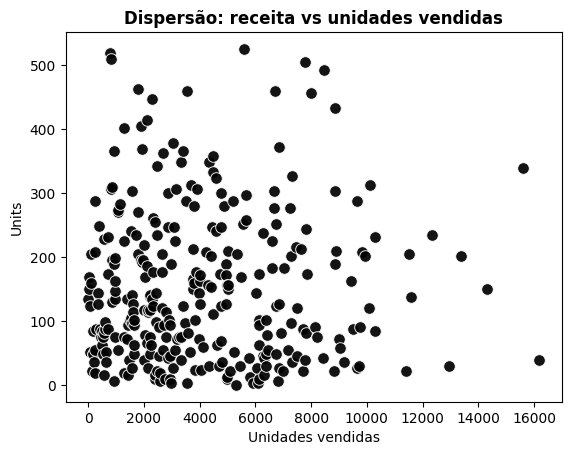

In [6]:
# Dataviz:
fig, ax = plt.subplots();
sns.scatterplot(dados, x='Amount', y='Units', s=70,  alpha=0.92, color='black');
plt.title('Dispersão: receita vs unidades vendidas', weight='bold');
plt.xlabel('Receita (U$D)');
plt.xlabel('Unidades vendidas');

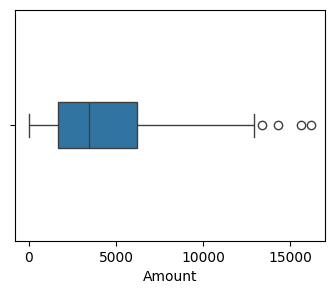

In [7]:
fix, ax = plt.subplots(figsize=(4,3));
sns.boxplot(dados, x='Amount', width=0.2);

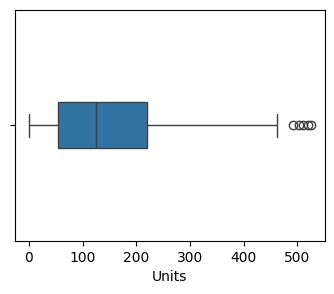

In [8]:
fix, ax = plt.subplots(figsize=(4,3));
sns.boxplot(dados, x='Units', width=0.2);

In [9]:
# modelo
modelo_IF = IsolationForest(contamination=0.05, random_state=50)

# treino
colunas_interesse = ['Amount', 'Units']
modelo_IF.fit(dados[colunas_interesse])

IsolationForest(contamination=0.05, random_state=50)

In [10]:
# scores
dados['score'] = modelo_IF.decision_function(dados[colunas_interesse])

# classe (anomalia)
dados['anomalia'] = modelo_IF.predict(dados[colunas_interesse])

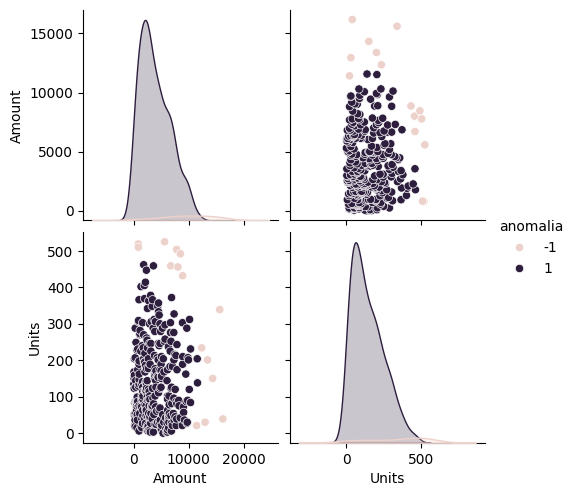

In [11]:
# visualização (pairplot)
sns.pairplot(dados, vars=colunas_interesse, hue='anomalia')

<Axes: xlabel='Amount', ylabel='Units'>

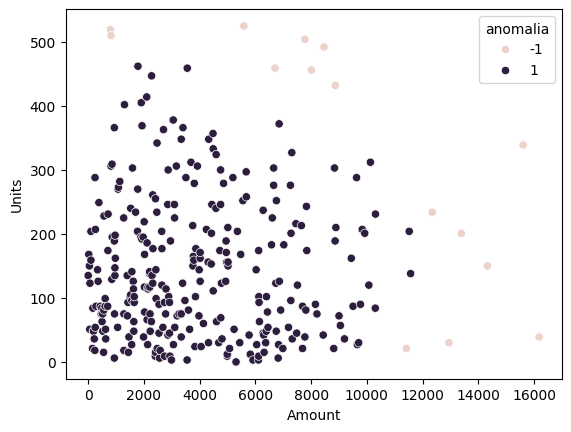

In [12]:
# visualização (scatter, pós-detecção)
sns.scatterplot(dados, x='Amount', y='Units', hue='anomalia',)

Outro exemplo

In [13]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao_2025/main/dados/concrete_data.csv' -O 'concrete_data.csv'

In [14]:
# Dados:
concreto = pd.read_csv('concrete_data.csv')
concreto.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [15]:
cols = ['concrete_compressive_strength']

# Isolation forest

# scores e anomalia

In [16]:
# boxplot

In [17]:
# Gráfico

Outros algoritmos:

* **Local Outlier Factor (LOF)** - baseado em densidade
* **One-class support vector machine (SVM)** - cria hiperplanos para separar anomalias de dados não-anômalos
* **Robust Covariance** - baseado na distribuição normal

## **Local Outlier Factor (LOF)**

In [18]:
from sklearn.neighbors import LocalOutlierFactor

cols = ['concrete_compressive_strength', 'water']

# especificar quantos vizinhos:
modelo_LOF_concreto = LocalOutlierFactor(n_neighbors=4)
concreto['anomalia_LOF'] = modelo_LOF_concreto.fit_predict(concreto[cols])

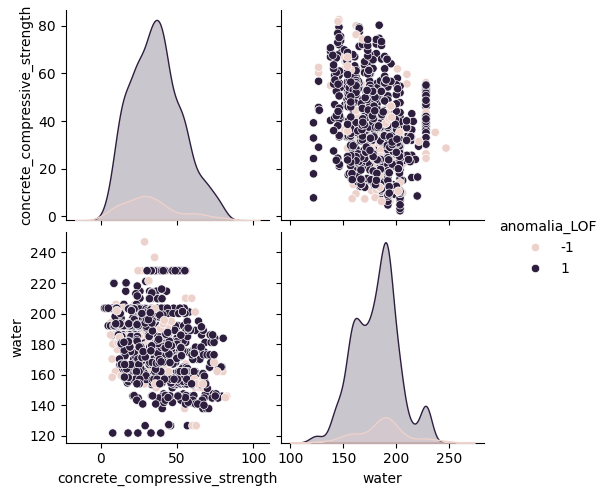

In [19]:
sns.pairplot(concreto, vars=cols, hue='anomalia_LOF')

## **One-class support vector machine (SVM)**

**Fundamento:** (Máquinas deVetores de Suporte - SVMs)

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/SMVs.png?raw=true" width="500px"/>

Objetivo:
* **SVM:** Classificação de dados em duas ou mais classes.
* **One-Class SVM:** Detecção de anomalias e identificação de dados que não se encaixam bem com a maioria dos dados de uma única classe.

Treinamento:
* **SVM:** Utiliza dados rotulados de múltiplas classes para aprender a separação.
* **One-Class SVM:** Utiliza dados de uma única classe (dados normais) para aprender o padrão e identificar o que é diferente.

Modelo:
* **SVM**: Cria um ou mais hiperplanos para separar diferentes classes.
* **One-Class SVM:** Cria uma função que define uma região onde os dados normais residem e identifica os dados fora dessa região como anômalos.

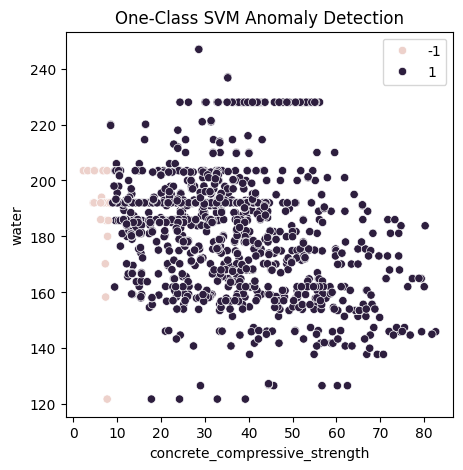

In [20]:
from sklearn.svm import OneClassSVM

# Treinando o One-Class SVM
oc_svm = OneClassSVM(kernel='poly', degree=3, nu=0.025, gamma='auto')
oc_svm.fit(concreto[['concrete_compressive_strength']])

# Fazendo previsões
predictions = oc_svm.predict(concreto[['concrete_compressive_strength']])
concreto['Anomalia_SVM'] = predictions

# Separando os dados normais e anômalos
dados_nao_anomalos = concreto[concreto['Anomalia_SVM'] == 1]
dados_anomalos = concreto[concreto['Anomalia_SVM'] == -1]

# Plotando os resultados
plt.figure(figsize=(5, 5))
sns.scatterplot(concreto, x='concrete_compressive_strength', y='water', hue='Anomalia_SVM')
plt.title('One-Class SVM Anomaly Detection')
plt.legend()
plt.show()

Tipos de margem:
* Hard-margin
* Soft-margin

Hiperparâmetros:
* nu (mais baixo, modelo mais suave)
* kernel (linear, polinomial, rbf, ...)
* gamma (mais baixo, modelo mais conservador em classificar outliers)

> Documentação [sklearn](https://scikit-learn.org/stable/modules/).